# Assignment
Build the AlexNet architecture and train it on the CIFAR10 dataset.

You may resize some of the kernel sizes (mainly the first one) and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224).

You may resize the number of kernels used per layer if it speeds up training and/or preserves accuracy. The exact AlexNet architecture and number of units will not work.

Report training, validation and test errors. Which hyperparameters did you change to improve performance?

**MAKE SURE YOU USE A GPU!** Top menu select "Runtime", then "Runtime Type". Make sure "Hardware Accelerator" has the option "GPU" selected.

Tips:
- Start with only a few of a layers and check if the network can learn.
- Add units and layers progressively.
- Kernels that are too large or too much pooling will reduce the size of layer ouputs
- Try Batch Norm and Dropout
- If you don't reproduce the exact architecture, that is fine. Explain what you changed and why!.
- Functional API!


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
import tensorflow.keras.backend as K
import pandas as pd

In [ ]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = keras.datasets.cifar10.load_data()

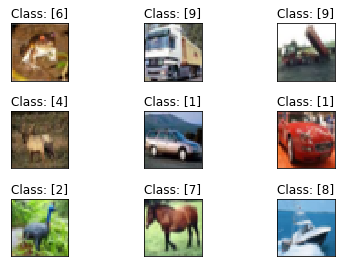

In [ ]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
# INVESTIGATE DATA and PREPROCESS
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_test_full.shape: {X_test_full.shape}')
print(f'y_train_full.shape: {y_train_full.shape}')
print(f'y_test_full.shape: {y_test_full.shape}')

print('----------')

y_train = keras.utils.to_categorical(y_train_full)
y_test = keras.utils.to_categorical(y_test_full)
print(f'y_train.shape categorical: {y_train.shape}')
print(f'y_test.shape categorical: {y_test.shape}')

print('----------')

print(f'X_train_full.min(): {X_train_full.min()}')
print(f'X_train_full.max(): {X_train_full.max()}')

X_train = X_train_full.astype('float32') / 255
X_test = X_test_full.astype('float32') / 255
print(f'X_train.shape after normalization: {X_train.shape}')

print('----------')

input_shape = X_train.shape[1:]
print(f'input_shape: {input_shape}')

X_train_full.shape: (50000, 32, 32, 3)
X_test_full.shape: (10000, 32, 32, 3)
y_train_full.shape: (50000, 1)
y_test_full.shape: (10000, 1)
----------
y_train.shape categorical: (50000, 10)
y_test.shape categorical: (10000, 10)
----------
X_train_full.min(): 0
X_train_full.max(): 255
X_train.shape after normalization: (50000, 32, 32, 3)
----------
input_shape: (32, 32, 3)


In [ ]:
# This model is the one that resembles AlexNet the most. There is no Batch 
# Normalization, nor Dropout. I wanted to have a model that I could keep as 
# similar to AlexNet as possible without loosing the pixels. In the comments
# you can see the original AlexNet architecture.

# START FRESH
K.clear_session()

# INPUT
inputs = keras.Input(shape=input_shape)

# CONVOLUTIONAL LAYER 1
cl_1 = Conv2D(
      filters=96,
      kernel_size=(4,4),
      # kernel_size=(11,11),
      strides=(2,2),
      # strides=(4,4),
      activation='relu',
      padding='same'
    )(inputs)

# POOLING LAYER
pl_1 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(cl_1)

# CONVOLUTIONAL LAYER 2
cl_2 = Conv2D(
      filters=256,
      kernel_size=(2,2),
      # kernel_size=(5,5),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(pl_1)

# POOLING LAYER
pl_2 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(cl_2)

# CONVOLUTIONAL LAYER 3
cl_3 = Conv2D(
      filters=384,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(pl_2)

# CONVOLUTIONAL LAYER 4
cl_4 = Conv2D(
      filters=384,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(cl_3)

# CONVOLUTIONAL LAYER 5
cl_5 = Conv2D(
      filters=256,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(cl_4)

# POOLING LAYER
pl_5 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(cl_5)

# FLATTEN
fl = Flatten()(pl_5)

# FULLY CONNECTED LAYER 1
fcl_1 = Dense(4096, activation='relu')(fl)

# FULLY CONNECTED LAYER 2
fcl_2 = Dense(4096, activation='relu')(fcl_1)

# OUTPUT LAYER
# output = Dense(1000, activation='softmax')(x)
output = Dense(10, activation='softmax')(fcl_2)

# MODEL
alex_net = Model(inputs, output)
alex_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

alex_net.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 96)        4704      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         98560     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         98688     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)        

In [ ]:
history = alex_net.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

Epoch 1/50
625/625 [==============================] - 6s 10ms/step - loss: 1.8603 - accuracy: 0.2720 - val_loss: 1.6366 - val_accuracy: 0.3562
Epoch 2/50
625/625 [==============================] - 6s 9ms/step - loss: 1.4808 - accuracy: 0.4356 - val_loss: 1.3355 - val_accuracy: 0.4997
Epoch 3/50
625/625 [==============================] - 6s 9ms/step - loss: 1.2945 - accuracy: 0.5243 - val_loss: 1.2294 - val_accuracy: 0.5523
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 1.1704 - accuracy: 0.5729 - val_loss: 1.1721 - val_accuracy: 0.5814
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 1.0745 - accuracy: 0.6104 - val_loss: 1.0816 - val_accuracy: 0.6138
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.9889 - accuracy: 0.6431 - val_loss: 1.0840 - val_accuracy: 0.6160
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 0.9292 - accuracy: 0.6662 - val_loss: 1.0491 - val_accuracy: 0.6278
Epoch

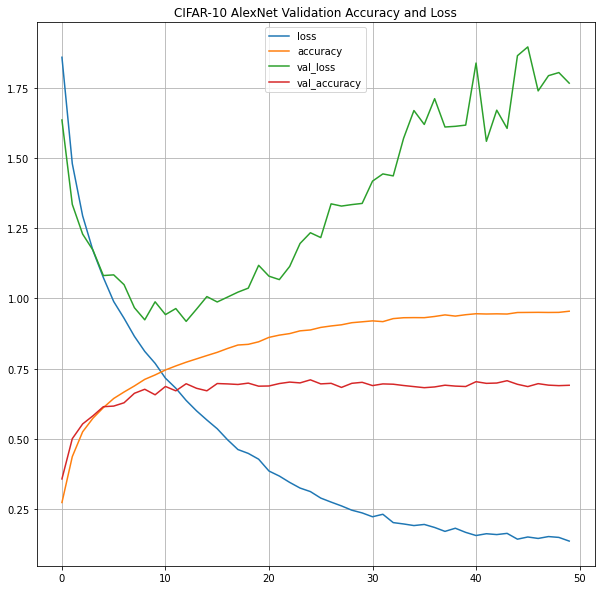

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.title('CIFAR-10 AlexNet Validation Accuracy and Loss')
_ = plt.show

In [ ]:
test_accuracy_and_loss = alex_net.evaluate(X_test, y_test)
print(f'test loss:  {test_accuracy_and_loss[0]}')
print(f'test accuracy:  {test_accuracy_and_loss[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 1.7793 - accuracy: 0.6893
test loss:  1.779322624206543
test accuracy:  0.689300000667572


In [ ]:
# This model has Batch Normalization as well as Dropout because the original
# model is overfitted since the validation loss is high and getting higher 
# throughout the epochs.

# START FRESH
K.clear_session()

# INPUT
inputs = keras.Input(shape=input_shape)

# CONVOLUTIONAL LAYER 1
cl_1 = Conv2D(
      filters=96,
      kernel_size=(4,4),
      # kernel_size=(11,11),
      strides=(2,2),
      # strides=(4,4),
      activation='relu',
      padding='same'
    )(inputs)

# # DROPOUT LAYER 1
dl_1 = Dropout(.1)(cl_1)

# BATCH NORMALIZATION LAYER 1
bl_1 = BatchNormalization()(dl_1)

# POOLING LAYER
pl_1 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(bl_1)

# CONVOLUTIONAL LAYER 2
cl_2 = Conv2D(
      filters=256,
      kernel_size=(2,2),
      # kernel_size=(5,5),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(pl_1)

# # DROPOUT LAYER 2
dl_2 = Dropout(.1)(cl_2)

# BATCH NORMALIZATION LAYER 2
bl_2 = BatchNormalization()(dl_2)

# POOLING LAYER
pl_2 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(bl_2)

# CONVOLUTIONAL LAYER 3
cl_3 = Conv2D(
      filters=384,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(pl_2)

# # DROPOUT LAYER 3
dl_3 = Dropout(.1)(cl_3)

# BATCH NORMALIZATION LAYER 3
bl_3 = BatchNormalization()(dl_3)

# CONVOLUTIONAL LAYER 4
cl_4 = Conv2D(
      filters=384,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(bl_3)

# # DROPOUT LAYER 4
dl_4 = Dropout(.1)(cl_4)

# BATCH NORMALIZATION LAYER 4
bl_4 = BatchNormalization()(dl_4)

# CONVOLUTIONAL LAYER 5
cl_5 = Conv2D(
      filters=256,
      kernel_size=(1,1),
      # kernel_size=(3,3),
      strides=(1,1), 
      activation='relu',
      padding='same'
    )(bl_4)

# POOLING LAYER
pl_5 = MaxPooling2D(pool_size=(3,3), strides=(2,2))(cl_5)

# FLATTEN
fl = Flatten()(pl_5)

# FULLY CONNECTED LAYER 1
fcl_1 = Dense(4096, activation='relu')(fl)

# FULLY CONNECTED LAYER 2
fcl_2 = Dense(4096, activation='relu')(fcl_1)

# OUTPUT LAYER
# output = Dense(1000, activation='softmax')(x)
output = Dense(10, activation='softmax')(fcl_2)

# MODEL
alex_net_bd = Model(inputs, output)
alex_net_bd.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

alex_net_bd.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 96)        4704      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         98560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 256)        

In [ ]:
history = alex_net_bd.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=64)

Epoch 1/50
625/625 [==============================] - 7s 11ms/step - loss: 1.5936 - accuracy: 0.4241 - val_loss: 1.9767 - val_accuracy: 0.3482
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 1.2358 - accuracy: 0.5546 - val_loss: 1.3684 - val_accuracy: 0.4986
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 1.0891 - accuracy: 0.6083 - val_loss: 1.2025 - val_accuracy: 0.5673
Epoch 4/50
625/625 [==============================] - 7s 11ms/step - loss: 0.9902 - accuracy: 0.6482 - val_loss: 1.7235 - val_accuracy: 0.4456
Epoch 5/50
625/625 [==============================] - 7s 11ms/step - loss: 0.9089 - accuracy: 0.6789 - val_loss: 1.0823 - val_accuracy: 0.6155
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 0.8433 - accuracy: 0.7018 - val_loss: 1.1260 - val_accuracy: 0.6132
Epoch 7/50
625/625 [==============================] - 7s 11ms/step - loss: 0.7892 - accuracy: 0.7206 - val_loss: 1.2255 - val_accuracy: 0.5925

In [ ]:
test_accuracy_and_loss = alex_net_bd.evaluate(X_test, y_test)
print(f'test loss:  {test_accuracy_and_loss[0]}')
print(f'test accuracy:  {test_accuracy_and_loss[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9699 - accuracy: 0.7547
test loss:  0.9699158072471619
test accuracy:  0.7547000050544739


<function matplotlib.pyplot.show>

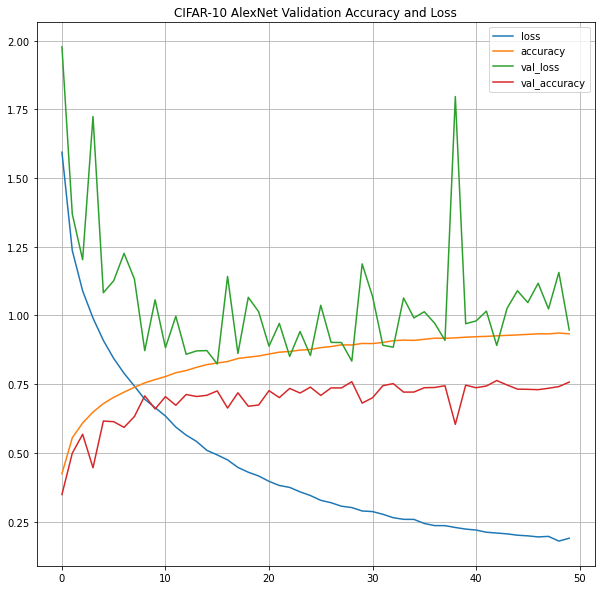

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.title('CIFAR-10 AlexNet Validation Accuracy and Loss')
plt.show

In [ ]:
# Both models still suffer from overfitting, however using Batch Normalization
# seemed to increase the validation accuracy and then in turn using Dropout
# lowered the loss (I tried them one by one, but this is not reflected in the
# current code)
#
# I started with epochs 5, but saw that the accuracy kept going up, but not 
# enough so I added more epochs. I had the batch_size somewhat higher than the 
# default to balance the overfitting, but that was not enough.
